# 우리 동네 인구 구조 시각화 하기
https://jumin.mois.go.kr/index.jsp#


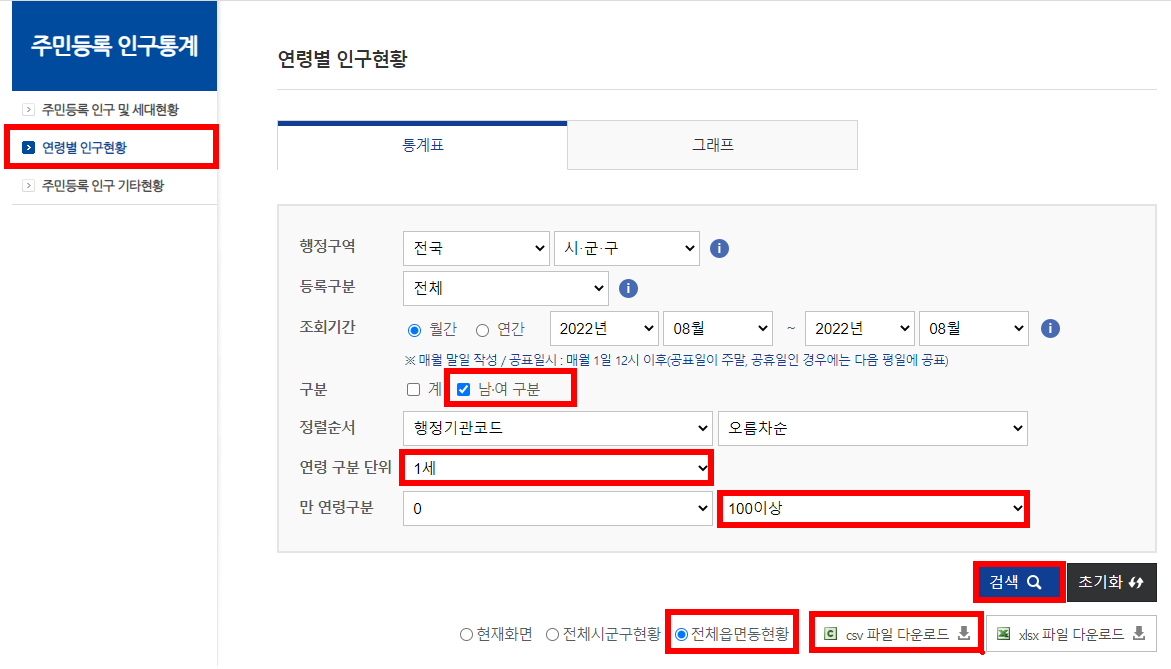

## 데이터 기초 정보 파악

In [1]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드
# 한글 인코딩 종류 euc_kr, utf-8, utf-8-sig(엑셀), ansi, cp949
df = pd.read_csv('./data/202306_202306_연령별인구현황_월간.csv', encoding='euc_kr')
df.head()


,행정구역,2023년06월_남_총인구수,2023년06월_남_연령구간인구수,2023년06월_남_0세,2023년06월_남_1세,2023년06월_남_2세,2023년06월_남_3세,2023년06월_남_4세,2023년06월_남_5세,2023년06월_남_6세,...,2023년06월_여_91세,2023년06월_여_92세,2023년06월_여_93세,2023년06월_여_94세,2023년06월_여_95세,2023년06월_여_96세,2023년06월_여_97세,2023년06월_여_98세,2023년06월_여_99세,2023년06월_여_100세 이상
0,서울특별시 (1100000000),"4,557,609","4,557,609","20,107","21,548","22,604","23,545","25,510","26,797","29,699",...,"6,240","4,736","4,075","3,258","2,377","1,723","1,023",721,511,"1,165"
1,서울특별시 종로구 (1111000000),"67,834","67,834",198,254,232,287,250,300,351,...,110,90,83,66,54,40,20,15,9,26
2,서울특별시 종로구 청운효자동(1111051500),"5,286","5,286",14,22,22,32,18,28,49,...,8,10,5,5,5,1,3,0,2,2
3,서울특별시 종로구 사직동(1111053000),"4,026","4,026",13,20,15,16,27,24,29,...,7,10,10,10,1,3,1,2,1,2
4,서울특별시 종로구 삼청동(1111054000),"1,089","1,089",2,4,3,2,3,4,4,...,3,1,4,0,1,0,0,0,0,1


In [3]:
df.columns

Index(['행정구역', '2023년06월_남_총인구수', '2023년06월_남_연령구간인구수', '2023년06월_남_0세',
       '2023년06월_남_1세', '2023년06월_남_2세', '2023년06월_남_3세', '2023년06월_남_4세',
       '2023년06월_남_5세', '2023년06월_남_6세',
       ...
       '2023년06월_여_91세', '2023년06월_여_92세', '2023년06월_여_93세', '2023년06월_여_94세',
       '2023년06월_여_95세', '2023년06월_여_96세', '2023년06월_여_97세', '2023년06월_여_98세',
       '2023년06월_여_99세', '2023년06월_여_100세 이상'],
      dtype='object', length=207)

In [4]:
df['행정구역']

0                서울특별시  (1100000000)
1             서울특별시 종로구 (1111000000)
2        서울특별시 종로구 청운효자동(1111051500)
3          서울특별시 종로구 사직동(1111053000)
4          서울특별시 종로구 삼청동(1111054000)
                    ...             
3872    제주특별자치도 서귀포시 서홍동(5013058000)
3873    제주특별자치도 서귀포시 대륜동(5013059000)
3874    제주특별자치도 서귀포시 대천동(5013060000)
3875    제주특별자치도 서귀포시 중문동(5013061000)
3876    제주특별자치도 서귀포시 예래동(5013062000)
Name: 행정구역, Length: 3877, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Columns: 207 entries, 행정구역 to 2023년06월_여_100세 이상
dtypes: int64(7), object(200)
memory usage: 6.1+ MB


1. 데이터건수: 3877
2. 컬럼 수: 207
3. 결측치 수: 데이터 양이 많아서 알 수 없음
4. 타입 적절성: 알 수 없음

In [9]:
# 우리동네 검색
df[df['행정구역'].str.contains('진안동')]

,행정구역,2023년06월_남_총인구수,2023년06월_남_연령구간인구수,2023년06월_남_0세,2023년06월_남_1세,2023년06월_남_2세,2023년06월_남_3세,2023년06월_남_4세,2023년06월_남_5세,2023년06월_남_6세,...,2023년06월_여_91세,2023년06월_여_92세,2023년06월_여_93세,2023년06월_여_94세,2023년06월_여_95세,2023년06월_여_96세,2023년06월_여_97세,2023년06월_여_98세,2023년06월_여_99세,2023년06월_여_100세 이상
1800,경기도 화성시 진안동(4159052000),"26,986","26,986",221,234,257,257,298,272,276,...,19,18,9,9,4,3,2,1,0,1


In [13]:
#컬럼명 2023년06월_ 삭제 - 언더바까지 삭제
df.columns = df.columns.str.replace('2023년06월_', '')
# 컬럼 파트에서 문자열 처리
df.columns


Index(['행정구역', '남_총인구수', '남_연령구간인구수', '남_0세', '남_1세', '남_2세', '남_3세', '남_4세',
       '남_5세', '남_6세',
       ...
       '여_91세', '여_92세', '여_93세', '여_94세', '여_95세', '여_96세', '여_97세', '여_98세',
       '여_99세', '여_100세 이상'],
      dtype='object', length=207)

In [14]:
df.head(1)

,행정구역,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,서울특별시 (1100000000),"4,557,609","4,557,609","20,107","21,548","22,604","23,545","25,510","26,797","29,699",...,"6,240","4,736","4,075","3,258","2,377","1,723","1,023",721,511,"1,165"


In [17]:
#전처리한 데이터프레임 저장
df.to_csv('./data/202306_202306_연령별인구현황_월간.csv', index = False)

In [19]:
df = pd.read_csv('./data/202306_202306_연령별인구현황_월간.csv')
df.head(3)

,행정구역,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,서울특별시 (1100000000),"4,557,609","4,557,609","20,107","21,548","22,604","23,545","25,510","26,797","29,699",...,"6,240","4,736","4,075","3,258","2,377","1,723","1,023",721,511,"1,165"
1,서울특별시 종로구 (1111000000),"67,834","67,834",198,254,232,287,250,300,351,...,110,90,83,66,54,40,20,15,9,26
2,서울특별시 종로구 청운효자동(1111051500),"5,286","5,286",14,22,22,32,18,28,49,...,8,10,5,5,5,1,3,0,2,2


In [20]:
for col in df.columns:
    print(col)

행정구역
남_총인구수
남_연령구간인구수
남_0세
남_1세
남_2세
남_3세
남_4세
남_5세
남_6세
남_7세
남_8세
남_9세
남_10세
남_11세
남_12세
남_13세
남_14세
남_15세
남_16세
남_17세
남_18세
남_19세
남_20세
남_21세
남_22세
남_23세
남_24세
남_25세
남_26세
남_27세
남_28세
남_29세
남_30세
남_31세
남_32세
남_33세
남_34세
남_35세
남_36세
남_37세
남_38세
남_39세
남_40세
남_41세
남_42세
남_43세
남_44세
남_45세
남_46세
남_47세
남_48세
남_49세
남_50세
남_51세
남_52세
남_53세
남_54세
남_55세
남_56세
남_57세
남_58세
남_59세
남_60세
남_61세
남_62세
남_63세
남_64세
남_65세
남_66세
남_67세
남_68세
남_69세
남_70세
남_71세
남_72세
남_73세
남_74세
남_75세
남_76세
남_77세
남_78세
남_79세
남_80세
남_81세
남_82세
남_83세
남_84세
남_85세
남_86세
남_87세
남_88세
남_89세
남_90세
남_91세
남_92세
남_93세
남_94세
남_95세
남_96세
남_97세
남_98세
남_99세
남_100세 이상
여_총인구수
여_연령구간인구수
여_0세
여_1세
여_2세
여_3세
여_4세
여_5세
여_6세
여_7세
여_8세
여_9세
여_10세
여_11세
여_12세
여_13세
여_14세
여_15세
여_16세
여_17세
여_18세
여_19세
여_20세
여_21세
여_22세
여_23세
여_24세
여_25세
여_26세
여_27세
여_28세
여_29세
여_30세
여_31세
여_32세
여_33세
여_34세
여_35세
여_36세
여_37세
여_38세
여_39세
여_40세
여_41세
여_42세
여_43세
여_44세
여_45세
여_46세
여_47세
여_48세
여_49세
여_50세
여_51세
여_52세
여_53세
여_54세
여_55세
여_56세
여_57세
여_58세
여_59세
여_60세
여_61세

남자 구간 인덱스:
여자 구간 인덱스:
둘 다 찾아보기
행정구역명, 남_총 인구 수, 남_연령구간 인구 수, 남 0 ~ 100세 이상, 여_총 인구 수, 여_연령구간 인구 수, 여 0 ~ 100세 이상,

In [21]:
df.columns


Index(['행정구역', '남_총인구수', '남_연령구간인구수', '남_0세', '남_1세', '남_2세', '남_3세', '남_4세',
       '남_5세', '남_6세',
       ...
       '여_91세', '여_92세', '여_93세', '여_94세', '여_95세', '여_96세', '여_97세', '여_98세',
       '여_99세', '여_100세 이상'],
      dtype='object', length=207)

In [23]:
# 남자만 추출
df.iloc[:,3:104]

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,남_91세,남_92세,남_93세,남_94세,남_95세,남_96세,남_97세,남_98세,남_99세,남_100세 이상
0,"20,107","21,548","22,604","23,545","25,510","26,797","29,699","33,087","34,344","33,913",...,"2,445","1,684","1,310","1,089",695,471,240,176,163,330
1,198,254,232,287,250,300,351,413,404,389,...,66,42,29,29,9,18,12,10,6,10
2,14,22,22,32,18,28,49,45,45,42,...,4,3,2,1,0,4,1,2,1,1
3,13,20,15,16,27,24,29,40,40,24,...,5,3,2,8,1,3,2,2,1,2
4,2,4,3,2,3,4,4,5,6,7,...,3,3,2,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,38,38,42,52,46,54,63,75,79,74,...,2,3,1,1,1,0,0,0,0,0
3873,58,62,70,99,73,80,95,85,90,85,...,5,5,2,1,2,0,0,0,0,0
3874,47,50,67,63,70,81,89,93,92,82,...,5,0,1,0,0,1,1,0,0,1
3875,22,43,36,51,44,49,51,63,65,44,...,1,4,0,3,0,0,0,0,0,0


In [24]:
# 여자만 추출
df.iloc[:,106:]

,여_0세,여_1세,여_2세,여_3세,여_4세,여_5세,여_6세,여_7세,여_8세,여_9세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,"19,268","20,445","21,315","22,062","23,467","25,519","28,340","31,997","32,954","32,080",...,"6,240","4,736","4,075","3,258","2,377","1,723","1,023",721,511,"1,165"
1,205,208,238,267,258,297,344,393,396,426,...,110,90,83,66,54,40,20,15,9,26
2,22,21,27,16,26,25,36,38,43,48,...,8,10,5,5,5,1,3,0,2,2
3,11,14,16,22,20,23,31,31,32,41,...,7,10,10,10,1,3,1,2,1,2
4,2,1,4,6,2,7,5,8,4,6,...,3,1,4,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,32,41,40,37,59,55,76,89,78,81,...,7,6,4,6,4,0,2,0,0,2
3873,49,64,45,56,69,68,82,81,88,80,...,10,10,11,8,4,5,3,2,1,9
3874,47,40,42,59,61,64,87,86,95,93,...,9,9,10,3,5,3,2,0,1,3
3875,39,36,41,43,48,40,44,59,48,75,...,11,9,10,4,3,4,3,1,1,3


In [25]:
for name in df['행정구역']:
    print(name)

서울특별시  (1100000000)
서울특별시 종로구 (1111000000)
서울특별시 종로구 청운효자동(1111051500)
서울특별시 종로구 사직동(1111053000)
서울특별시 종로구 삼청동(1111054000)
서울특별시 종로구 부암동(1111055000)
서울특별시 종로구 평창동(1111056000)
서울특별시 종로구 무악동(1111057000)
서울특별시 종로구 교남동(1111058000)
서울특별시 종로구 가회동(1111060000)
서울특별시 종로구 종로1.2.3.4가동(1111061500)
서울특별시 종로구 종로5.6가동(1111063000)
서울특별시 종로구 이화동(1111064000)
서울특별시 종로구 혜화동(1111065000)
서울특별시 종로구 창신제1동(1111067000)
서울특별시 종로구 창신제2동(1111068000)
서울특별시 종로구 창신제3동(1111069000)
서울특별시 종로구 숭인제1동(1111070000)
서울특별시 종로구 숭인제2동(1111071000)
서울특별시 중구 (1114000000)
서울특별시 중구 소공동(1114052000)
서울특별시 중구 회현동(1114054000)
서울특별시 중구 명동(1114055000)
서울특별시 중구 필동(1114057000)
서울특별시 중구 장충동(1114058000)
서울특별시 중구 광희동(1114059000)
서울특별시 중구 을지로동(1114060500)
서울특별시 중구 신당동(1114061500)
서울특별시 중구 다산동(1114062500)
서울특별시 중구 약수동(1114063500)
서울특별시 중구 청구동(1114064500)
서울특별시 중구 신당제5동(1114065000)
서울특별시 중구 동화동(1114066500)
서울특별시 중구 황학동(1114067000)
서울특별시 중구 중림동(1114068000)
서울특별시 용산구 (1117000000)
서울특별시 용산구 후암동(1117051000)
서울특별시 용산구 용산2가동(1117052000)
서울특별시 용산구 남영동(11

In [30]:
df.isnull().sum().sum()   # 결측치가 없는 데이터 - 개꿀

0

In [31]:
df.head()

,행정구역,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,서울특별시 (1100000000),"4,557,609","4,557,609","20,107","21,548","22,604","23,545","25,510","26,797","29,699",...,"6,240","4,736","4,075","3,258","2,377","1,723","1,023",721,511,"1,165"
1,서울특별시 종로구 (1111000000),"67,834","67,834",198,254,232,287,250,300,351,...,110,90,83,66,54,40,20,15,9,26
2,서울특별시 종로구 청운효자동(1111051500),"5,286","5,286",14,22,22,32,18,28,49,...,8,10,5,5,5,1,3,0,2,2
3,서울특별시 종로구 사직동(1111053000),"4,026","4,026",13,20,15,16,27,24,29,...,7,10,10,10,1,3,1,2,1,2
4,서울특별시 종로구 삼청동(1111054000),"1,089","1,089",2,4,3,2,3,4,4,...,3,1,4,0,1,0,0,0,0,1


In [33]:
# 컴마가 들어가 있는 것들은 문자로 되어 있음 그래서 이걸 int로 바꿔줘야 함.
df.iloc[:,1:].astype('int64')   # 이렇게 하면 오류가 남, 컴마 때문에

ValueError: invalid literal for int() with base 10: '4,557,609'

In [ ]:
# 형 변화 시도

## 데이터 전처리
* 불필요 데이터 삭제
* 컬럼0번째를 인덱스로 설정

In [36]:
# 행정구역을 index_col로 정하고 로드 -> 동 이름으로 검색을 많이 하기 때문에
df = pd.read_csv('./data/202306_202306_연령별인구현황_월간.csv', thousands=',', index_col=0)
# 이렇게 하면 천 단위 ,를 수치로 인지함
df.head()
#이렇게 보면 행정구역도 index로 내려와 있음

,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),4557609,4557609,20107,21548,22604,23545,25510,26797,29699,33087,...,6240,4736,4075,3258,2377,1723,1023,721,511,1165
서울특별시 종로구 (1111000000),67834,67834,198,254,232,287,250,300,351,413,...,110,90,83,66,54,40,20,15,9,26
서울특별시 종로구 청운효자동(1111051500),5286,5286,14,22,22,32,18,28,49,45,...,8,10,5,5,5,1,3,0,2,2
서울특별시 종로구 사직동(1111053000),4026,4026,13,20,15,16,27,24,29,40,...,7,10,10,10,1,3,1,2,1,2
서울특별시 종로구 삼청동(1111054000),1089,1089,2,4,3,2,3,4,4,5,...,3,1,4,0,1,0,0,0,0,1


In [37]:
df.info()   # 다시 보면 전체 값이 int로 바뀐 것을 볼 수 있음.

<class 'pandas.core.frame.DataFrame'>
Index: 3877 entries, 서울특별시  (1100000000) to 제주특별자치도 서귀포시 예래동(5013062000)
Columns: 206 entries, 남_총인구수 to 여_100세 이상
dtypes: int64(206)
memory usage: 6.1+ MB


> **[데이터에 대한 질문]**
> * 종로구의 인구구조는 어떨까?
> * 부산시 남구 문현동의 인구구조는 어떨가?
>   
>   

In [38]:
# 불필요한 데이터 삭제
#남_총인구수,남_연령구간인구수
#여_총인구수,여_연령구간인구수
df.drop(['남_총인구수','남_연령구간인구수'],axis=1,inplace=True)
df.drop(['여_총인구수','여_연령구간인구수'],axis=1,inplace=True)

In [39]:
df.head()

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),20107,21548,22604,23545,25510,26797,29699,33087,34344,33913,...,6240,4736,4075,3258,2377,1723,1023,721,511,1165
서울특별시 종로구 (1111000000),198,254,232,287,250,300,351,413,404,389,...,110,90,83,66,54,40,20,15,9,26
서울특별시 종로구 청운효자동(1111051500),14,22,22,32,18,28,49,45,45,42,...,8,10,5,5,5,1,3,0,2,2
서울특별시 종로구 사직동(1111053000),13,20,15,16,27,24,29,40,40,24,...,7,10,10,10,1,3,1,2,1,2
서울특별시 종로구 삼청동(1111054000),2,4,3,2,3,4,4,5,6,7,...,3,1,4,0,1,0,0,0,0,1


# 우리동네 연령별 인구구조
* 남, 여 데이터 각각 추출

In [51]:
# 우리 동네 검색
mytown = df[df.index.str.contains('진안동')]


In [52]:
mytown.head()

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
경기도 화성시 진안동(4159052000),221,234,257,257,298,272,276,270,274,213,...,19,18,9,9,4,3,2,1,0,1


In [54]:
mytown.iloc[:,:101]

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,남_91세,남_92세,남_93세,남_94세,남_95세,남_96세,남_97세,남_98세,남_99세,남_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
경기도 화성시 진안동(4159052000),221,234,257,257,298,272,276,270,274,213,...,7,1,1,1,2,1,0,0,0,2


In [56]:
#남여 데이터 추출
male = mytown.iloc[:,:101]
female = mytown.iloc[:,101:]

In [58]:
male.shape, female.shape

((1, 101), (1, 101))

In [62]:
#연령별 남여 합계 계산
total = []

for i in range(101):
    #print(i)
    tmp = female.iloc[0,i] + male.iloc[0,i]
    print(i, tmp)
    total.append(tmp)


0 423
1 473
2 505
3 494
4 540
5 530
6 533
7 519
8 503
9 463
10 474
11 485
12 452
13 409
14 408
15 460
16 347
17 380
18 378
19 412
20 419
21 488
22 582
23 642
24 678
25 714
26 865
27 871
28 1021
29 1103
30 1063
31 1084
32 1012
33 1010
34 1029
35 1003
36 967
37 1002
38 997
39 1024
40 1086
41 1131
42 1076
43 1009
44 831
45 817
46 749
47 758
48 722
49 813
50 850
51 758
52 799
53 729
54 737
55 663
56 614
57 594
58 564
59 503
60 546
61 504
62 602
63 475
64 440
65 389
66 364
67 352
68 335
69 269
70 264
71 256
72 172
73 165
74 157
75 178
76 207
77 114
78 134
79 130
80 140
81 111
82 85
83 94
84 89
85 70
86 68
87 47
88 40
89 29
90 32
91 26
92 19
93 10
94 10
95 6
96 4
97 2
98 1
99 0
100 3


In [73]:
# 번외: 다른방법 - 행렬로
male.columns = range(0, 101)
female.columns = range(0, 101)

total_df = male + female
total_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
행정구역,,,,,,,,,,,,,,,,,,,,,
경기도 화성시 진안동(4159052000),423,473,505,494,540,530,533,519,503,463,...,26,19,10,10,6,4,2,1,0,3


In [64]:
len(total)

101

In [65]:
# 0세 남녀 인구수 합은?
total[0]

423

## line 차트

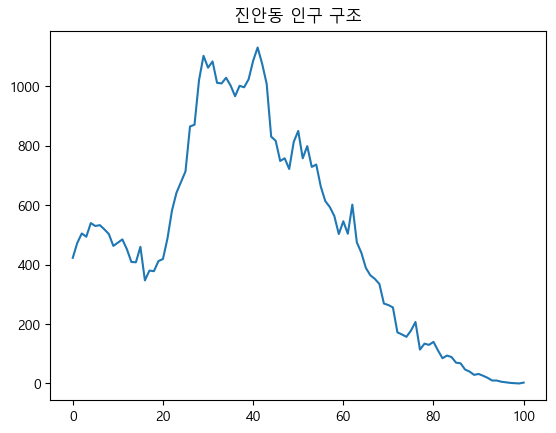

In [74]:
name = '진안동'

plt.figure()
#plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.plot(total)

plt.show()

> * 젊은 부부가 많이 사는 동네로 보입니다. 
> * 30 ~ 50대가 많이 살고 있고,
> * 반면 노년층이 적습니다. 

## Bar 차트
* bar차트는 두 종류의 값들이 입력됩니다. 
* bar(막대를 표시할 위치, 막대 높이)
* 두 종류의 값들은 개수가 일치해야 합니다. 

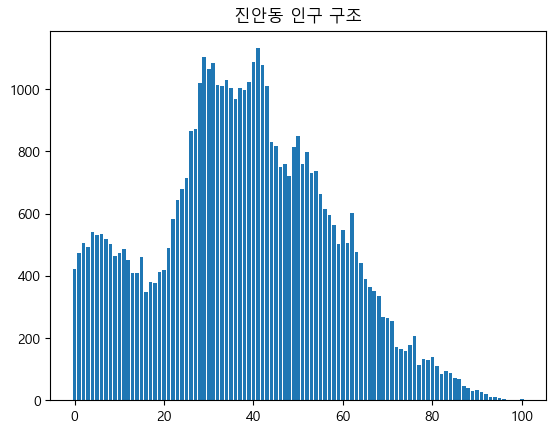

In [76]:
name = '진안동'

plt.figure()
#plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.bar(range(101), total)

plt.show()

## barh 차트

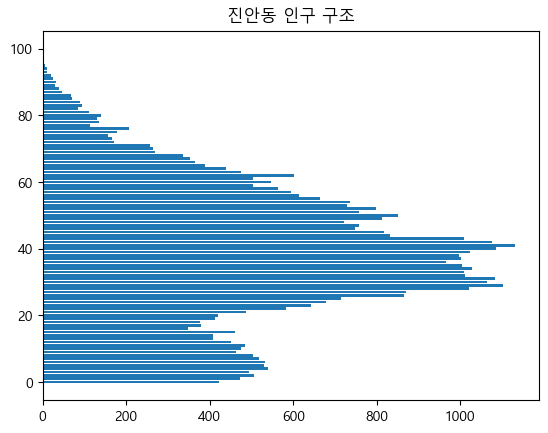

In [78]:
name = '진안동'

plt.figure()
#plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.barh(range(101), total)

plt.show()

## 진짜 우리동네 인구구조

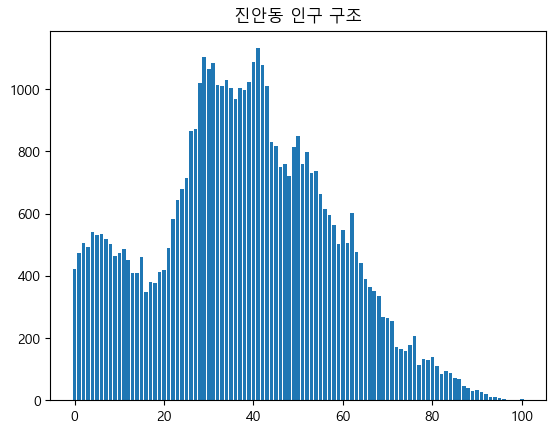

In [84]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드

# 행정구역을 index_col로 정하고 로드 -> 동 이름으로 검색을 많이 하기 때문에
df = pd.read_csv('./data/202306_202306_연령별인구현황_월간.csv', thousands=',', index_col=0)
# 이렇게 하면 천 단위 ,를 수치로 인지함

# 불필요한 컬럼 삭제

# 불필요한 데이터 삭제
df.drop(['남_총인구수','남_연령구간인구수'],axis=1,inplace=True)
#남_총인구수,남_연령구간인구수
df.drop(['여_총인구수','여_연령구간인구수'],axis=1,inplace=True)
#여_총인구수,여_연령구간인구수

# 우리동네 데이터 추출(검색)
mytown = df[df.index.str.contains('진안동')]

# 남, 여 데이터 분리 추출
male = mytown.iloc[:,:101]
female = mytown.iloc[:,101:]
male.shape, female.shape

#연령별 남여 합계 계산
total = []

for i in range(101):
    #print(i)
    tmp = female.iloc[0,i] + male.iloc[0,i]
    #print(i, tmp)
    total.append(tmp)

# bar chart 그리기
name = '진안동'

plt.figure()
#plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.bar(range(101), total)

plt.show()







우리동네 연령별 인구 구조 분석하기
1. 30 ~ 50대 부부가 많이 사는 것처럼 보입니다.
2. 0세 ~ 60세까지 20대가 가장 적게 살고 있으며
3. 노년층도 적은 비율을 보이고 있습니다.

# 우리동네 남여 구조 

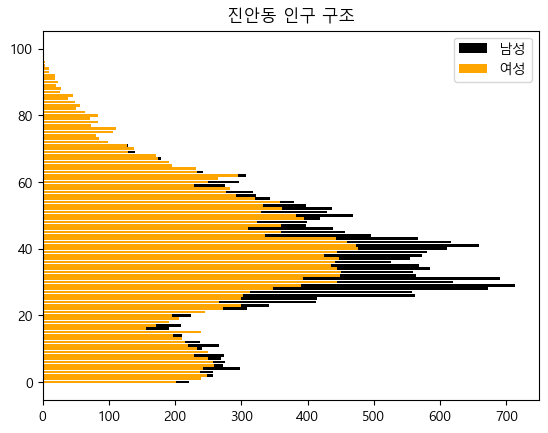

In [91]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

# 데이터 로드

# 행정구역을 index_col로 정하고 로드 -> 동 이름으로 검색을 많이 하기 때문에
df = pd.read_csv('./data/202306_202306_연령별인구현황_월간.csv', thousands=',', index_col=0)
# 이렇게 하면 천 단위 ,를 수치로 인지함

# 불필요한 컬럼 삭제

# 불필요한 데이터 삭제
df.drop(['남_총인구수','남_연령구간인구수'],axis=1,inplace=True)
#남_총인구수,남_연령구간인구수
df.drop(['여_총인구수','여_연령구간인구수'],axis=1,inplace=True)
#여_총인구수,여_연령구간인구수

# 우리동네 데이터 추출(검색)
mytown = df[df.index.str.contains('진안동')]

# 남, 여 데이터 분리 추출
male = mytown.iloc[:,:101]
female = mytown.iloc[:,101:]

# bar chart 그리기
name = '진안동'

plt.figure()
#plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.barh(range(101), male.iloc[0], label = '남성', color = 'black')
plt.barh(range(101), female.iloc[0], label = '여성', color = 'orange')

plt.legend()
plt.show()







In [92]:
male * -1

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,남_91세,남_92세,남_93세,남_94세,남_95세,남_96세,남_97세,남_98세,남_99세,남_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
경기도 화성시 진안동(4159052000),-221,-234,-257,-257,-298,-272,-276,-270,-274,-213,...,-7,-1,-1,-1,-2,-1,0,0,0,-2


## 모든 값 음수로 변환

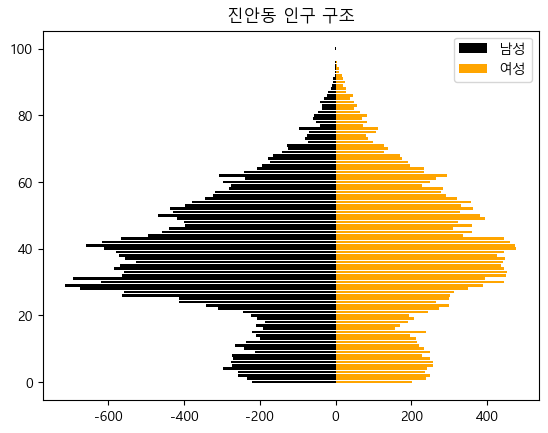

In [94]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

# 데이터 로드

# 행정구역을 index_col로 정하고 로드 -> 동 이름으로 검색을 많이 하기 때문에
df = pd.read_csv('./data/202306_202306_연령별인구현황_월간.csv', thousands=',', index_col=0)
# 이렇게 하면 천 단위 ,를 수치로 인지함

# 불필요한 컬럼 삭제

# 불필요한 데이터 삭제
df.drop(['남_총인구수','남_연령구간인구수'],axis=1,inplace=True)
#남_총인구수,남_연령구간인구수
df.drop(['여_총인구수','여_연령구간인구수'],axis=1,inplace=True)
#여_총인구수,여_연령구간인구수

# 우리동네 데이터 추출(검색)
mytown = df[df.index.str.contains('진안동')]

# 남, 여 데이터 분리 추출
male = mytown.iloc[:,:101] * -1
female = mytown.iloc[:,101:]

# bar chart 그리기
name = '진안동'

plt.figure()
#plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.barh(range(101), male.iloc[0], label = '남성', color = 'black')
plt.barh(range(101), female.iloc[0], label = '여성', color = 'orange')

plt.legend()
plt.show()







> **[해석]**
> *    ㅇㅇㅇ

## 진짜 우리동네 남여 구조

# 바람부는 제주에는 정말 여성의 비율이 높을까?

## 데이터 로딩 및 전처리

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('./data/202306_202306_연령별인구현황_월간.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

        
#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)]

m = mytown['남_총인구수'][0]
f = mytown['여_총인구수'][0]
m, f
## 중복데이터가 많이 나옴, 그중에서 0번째 데이터 사용할 것임



(338857, 337975)

## pie 차트
* 전체 데이터 중 특정 데이터의 비율을 보기 쉽게 표현합니다. 

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/202306_202306_연령별인구현황_월간.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 
         

#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)]

m = mytown['남_총인구수'][0]
f = mytown['여_총인구수'][0]
m,f

(338857, 337975)

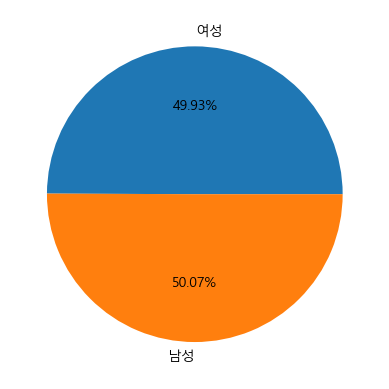

In [102]:
import matplotlib.pyplot as plt

plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.pie([f, m], labels = ['여성', '남성'], autopct = '%.2f%%') # 소수점 2번째자리
plt.show()


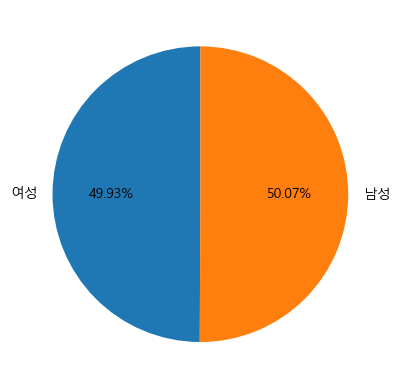

In [103]:
import matplotlib.pyplot as plt

plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.pie([f, m], labels = ['여성', '남성'], autopct = '%.2f%%', startangle = 90) # 소수점 2번째자리
plt.show()


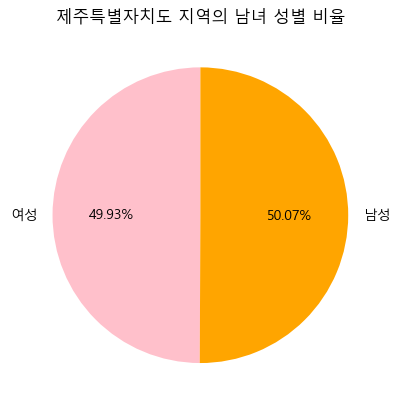

In [106]:
plt.title(f'{name} 지역의 남녀 성별 비율')
plt.pie([f, m], labels = ['여성', '남성'], autopct = '%.2f%%', startangle = 90, colors = ['pink', 'orange']) # 소수점 2번째자리
plt.show()

[해석]
제주도의 남녀 비율은 거의 반반이라고 봐도 된다.
우리의 통념과는 다른 내용

## line: 제주특별자치도 남여 인구 구조¶

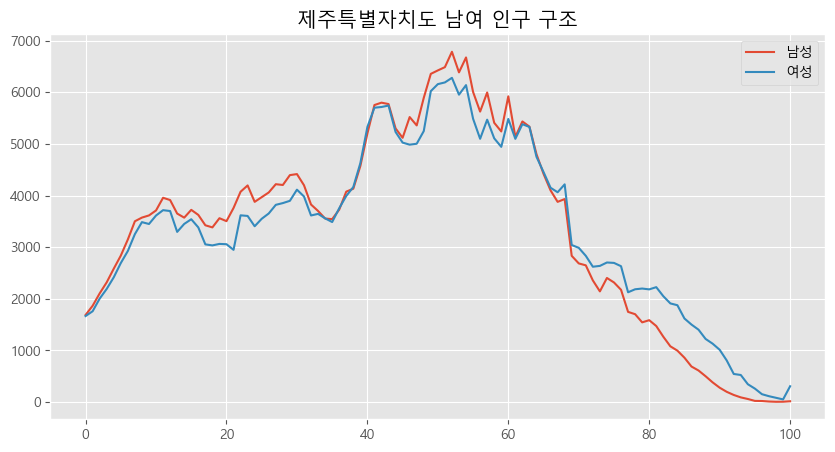

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/202306_202306_연령별인구현황_월간.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

# 불필요한 데이터 삭제
df.drop(['남_총인구수','남_연령구간인구수'],axis=1,inplace=True)
df.drop(['여_총인구수','여_연령구간인구수'],axis=1,inplace=True)


#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)] # 공백 데이터 처리

#남여 데이터 추출
male = mytown.iloc[0,0:101]
female = mytown.iloc[0,101:202]

# print(male.shape)


plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus']=False

plt.title('{} 남여 인구 구조'.format(name))

plt.plot(male.values, label = '남성')
plt.plot(female.values, label = '여성')

plt.legend()
plt.show()

> * 항아리 모양 그래프보다 남녀 인구의 차이가 눈에 더 잘 들어옵니다. 
> * 좀 더 차이가 한 눈에 들어오도록 한다면?

## bar:제주특별자치도 남여 인구 구조

* 남자-여자를 뺀 값으로  막대그래프 그려봄

### 데이터 로딩 및 전처리

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/202306_202306_연령별인구현황_월간.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

# 불필요한 데이터 삭제
df.drop(['남_총인구수','남_연령구간인구수'],axis=1,inplace=True)
df.drop(['여_총인구수','여_연령구간인구수'],axis=1,inplace=True)


#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)] # 공백 데이터 처리

#남여 데이터 추출
male = mytown.iloc[0,0:101]
female = mytown.iloc[0,101:202]

print(male-female)

# 남자-여자 연산 실패 --> index값이 같이 않아서...


남_0세        NaN
남_100세 이상   NaN
남_10세       NaN
남_11세       NaN
남_12세       NaN
             ..
여_96세       NaN
여_97세       NaN
여_98세       NaN
여_99세       NaN
여_9세        NaN
Name: 제주특별자치도  (5000000000), Length: 202, dtype: float64


In [120]:
male.values - female.values

array([  21,  106,  101,  128,  167,  144,  223,  249,   88,  166,   98,
        240,  213,  355,  122,  182,  242,  370,  349,  498,  447,  811,
        457,  591,  473,  419,  407,  400,  351,  498,  302,  218,  212,
         56,   -3,   56,  -27,   84,  -33,  -56, -127,   52,   84,   29,
         69,   93,  535,  355,  644,  335,  266,  296,  505,  432,  536,
        519,  527,  527,  301,  298,  439,   37,   53,    6,   51,  -35,
        -51, -186, -285, -210, -302, -184, -265, -494, -300, -379, -457,
       -380, -483, -655, -597, -753, -785, -831, -880, -760, -813, -791,
       -723, -750, -735, -608, -407, -434, -286, -238, -132, -103,  -77,
        -45, -291], dtype=int64)

### 남성에서 여성인구를 빼서 차이 정도를 시각화

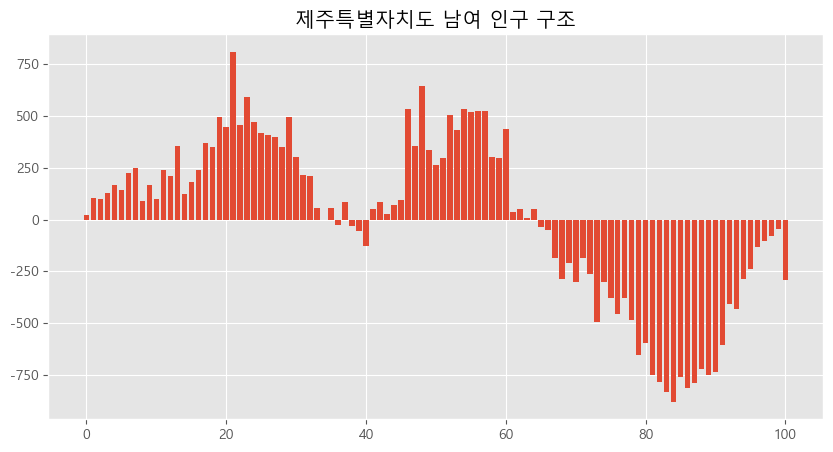

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/202306_202306_연령별인구현황_월간.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

# 불필요한 데이터 삭제
df.drop(['남_총인구수','남_연령구간인구수'],axis=1,inplace=True)
df.drop(['여_총인구수','여_연령구간인구수'],axis=1,inplace=True)


#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)] # 공백 데이터 처리

#남여 데이터 추출
male = mytown.iloc[0,0:101]
female = mytown.iloc[0,101:202]

#남-여 데이터 만들기
result = male.values - female.values 

plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus']=False

plt.title('{} 남여 인구 구조'.format(name))

plt.bar(range(101), result)
plt.show()

> * 60대를 기준으로 그 이하의 연령대는 남성이 많지만,
> * 60대 이상 인구는 여성이 많다는 것이 확연히 드러납니다. 

In [123]:
lst = []
for idx, value in enumerate(result):
    if value > 0:
        lst.append(idx)
lst

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 37,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64]

In [121]:
man_lst = [idx for idx, value in enumerate(result) if value > 0]

len(man_lst)

60

In [1]:
import seaborn as sns
import pandas as pd
tit_df = sns.load_dataset("titanic")
tit_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
tit_df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [10]:
#df = tit_df.loc[1:100, 'pclass'], tit_df.loc[1:100, 'age'], tit_df.loc[1:100, 'fare']
#df
df = tit_df.loc[:,['pclass', 'age', 'fare']].iloc[:101, :]

In [16]:
#df.drop('pclass', axis=1, inplace=True)
df

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
96,71.0,34.6542
97,23.0,63.3583
98,34.0,23.0000
99,34.0,26.0000
